In [97]:
from sklearn.datasets import load_iris
import pandas as pd
dataset=load_iris()

In [98]:
dir(dataset)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [99]:
b=dataset.data
c=dataset.feature_names

dataset= pd.DataFrame(b,columns=dataset.feature_names)
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [100]:
dataset = dataset.drop(['sepal width (cm)', 'sepal length (cm)'], axis='columns')


In [101]:
dataset.head()


,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


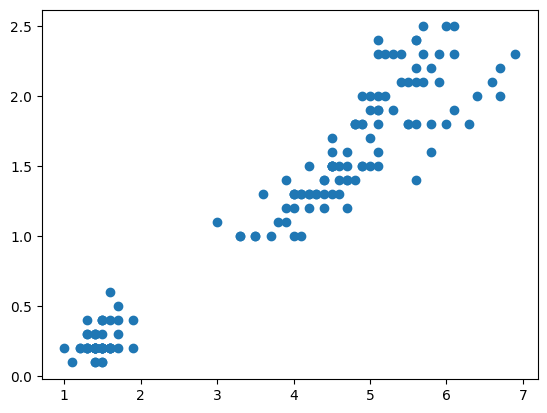

In [102]:
import matplotlib.pyplot as plt
plt.scatter(dataset['petal length (cm)'],dataset ['petal width (cm)'])

In [103]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=2)
y=model.fit_predict(dataset)


In [104]:
dataset['Clusters']=y
dataset

,petal length (cm),petal width (cm),Clusters
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,1
147,5.2,2.0,1
148,5.4,2.3,1


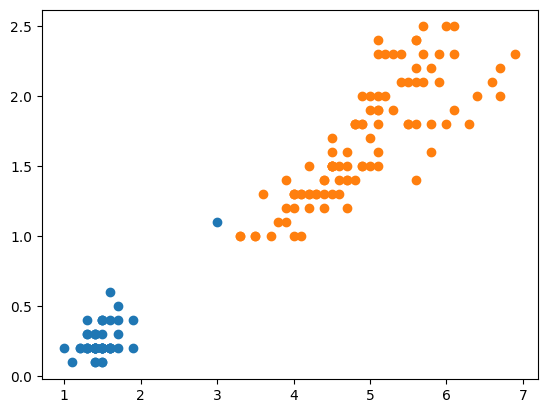

In [105]:
df0=dataset[dataset.Clusters==0]
df1=dataset[dataset.Clusters==1]
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'])
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'])


In [106]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[['petal length (cm)']])
dataset['petal length (cm)']=scaler.transform(dataset[['petal length (cm)']])
scaler.fit(dataset[['petal width (cm)']])
dataset['petal width (cm)']=scaler.transform(dataset[['petal width (cm)']])

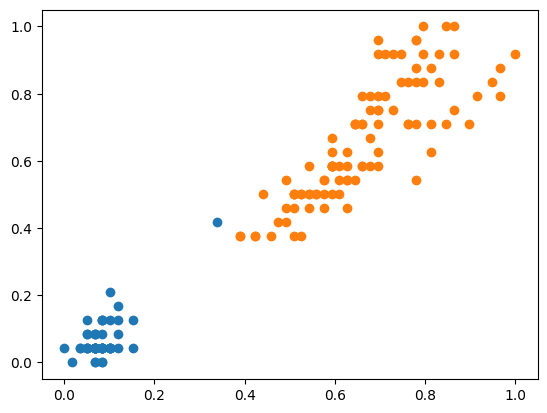

In [107]:
df0=dataset[dataset.Clusters==0]
df1=dataset[dataset.Clusters==1]
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'])
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'])

In [108]:
df0.head(),df1.head()

(   petal length (cm)  petal width (cm)  Clusters
 0           0.067797          0.041667         0
 1           0.067797          0.041667         0
 2           0.050847          0.041667         0
 3           0.084746          0.041667         0
 4           0.067797          0.041667         0,
     petal length (cm)  petal width (cm)  Clusters
 50           0.627119          0.541667         1
 51           0.593220          0.583333         1
 52           0.661017          0.583333         1
 53           0.508475          0.500000         1
 54           0.610169          0.583333         1)

In [109]:
range1=range(1,10)
error=[]
for i in range1:
    model=KMeans(n_clusters=i)
    model.fit_predict(dataset)
    error.append(model.inertia_)
error

[62.0283532197272,
 5.203621019680785,
 1.8344598085207258,
 1.3054904597535972,
 1.0196498569415133,
 0.8655808225193938,
 0.655136434076137,
 0.5831450923692586,
 0.47298606483919736]

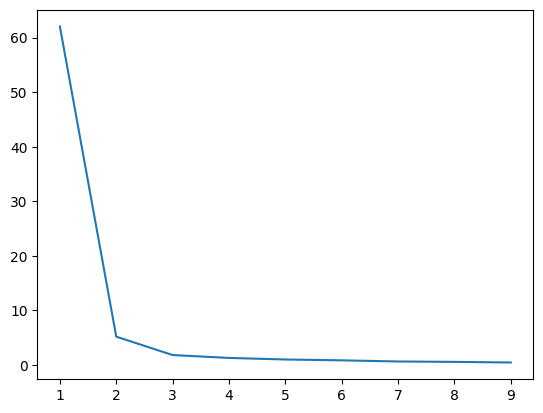

In [110]:
plt.plot(range1,error)

In [111]:
finalModel=KMeans(n_clusters=3)
y=finalModel.fit_predict(dataset)
dataset.head

<bound method NDFrame.head of      petal length (cm)  petal width (cm)  Clusters
0             0.067797          0.041667         0
1             0.067797          0.041667         0
2             0.050847          0.041667         0
3             0.084746          0.041667         0
4             0.067797          0.041667         0
..                 ...               ...       ...
145           0.711864          0.916667         1
146           0.677966          0.750000         1
147           0.711864          0.791667         1
148           0.745763          0.916667         1
149           0.694915          0.708333         1

[150 rows x 3 columns]>

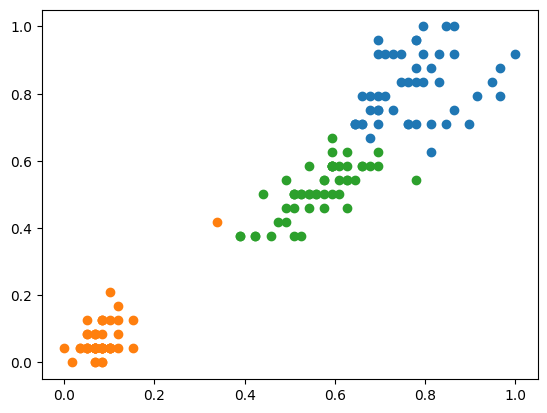

In [113]:
dataset['Clustering']=y
dff0=dataset[dataset.Clustering==0]
dff1=dataset[dataset.Clustering==1]
dff2=dataset[dataset.Clustering==2]
plt.scatter(dff0['petal length (cm)'],dff0['petal width (cm)'])
plt.scatter(dff1['petal length (cm)'],dff1['petal width (cm)'])
plt.scatter(dff2['petal length (cm)'],dff2['petal width (cm)'])